In [2]:
!python blend_models.py --lower_res_pkl=./results/human.pkl --higher_res_pkl=./results/robot.pkl --output_path=./results/human-robot.pkl --model_res=256 --split_res=32

In [3]:
import torch
import legacy
import dnnlib
import random

human_network = "./results/human.pkl"
robot_network = "./results/robot.pkl"
human_robot_network = "./results/human-robot.pkl"
gen_folder = "./results/generated"
human_folder = gen_folder+"/human"
robot_folder = gen_folder+"/robot"
human_robot_folder = gen_folder+"/human_robot"

seeds = random.sample(range(1000,10000),100)
seeds_str = ','.join(map(str, seeds))


In [4]:
!python ./generate.py --network=$human_network --outdir=$human_folder --trunc=1 --seeds=$seeds_str

Loading networks from "./results/human.pkl"...
Generating image for seed 9730 (0/100) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 7216 (1/100) ...
Generating image for seed 8790 (2/100) ...
Generating image for seed 2535 (3/100) ...
Generating image for seed 2514 (4/100) ...
Generating image for seed 5415 (5/100) ...
Generating image for seed 7882 (6/100) ...
Generating image for seed 8927 (7/100) ...
Generating image for seed 4359 (8/100) ...
Generating image for seed 9287 (9/100) ...
Generating image for seed 8319 (10/100) ...
Generating image for seed 5720 (11/100) ...
Generating image for seed 2838 (12/100) ...
Generating image for seed 1833 (13/100) ...
Generating image for seed 2414 (14/100) ...
Generating image for seed 2786 (15/100) ...
Generating image for seed 8162 (16/100) ...
Generating image for seed 2505 (17/100) ...
Generating image for seed 1675 (18/100) ...
Generating image for

In [7]:
!python ./generate.py --network=$robot_network --outdir=$robot_folder --trunc=1 --seeds=$seeds_str

Loading networks from "./results/robot.pkl"...
Generating image for seed 9730 (0/100) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 7216 (1/100) ...
Generating image for seed 8790 (2/100) ...
Generating image for seed 2535 (3/100) ...
Generating image for seed 2514 (4/100) ...
Generating image for seed 5415 (5/100) ...
Generating image for seed 7882 (6/100) ...
Generating image for seed 8927 (7/100) ...
Generating image for seed 4359 (8/100) ...
Generating image for seed 9287 (9/100) ...
Generating image for seed 8319 (10/100) ...
Generating image for seed 5720 (11/100) ...
Generating image for seed 2838 (12/100) ...
Generating image for seed 1833 (13/100) ...
Generating image for seed 2414 (14/100) ...
Generating image for seed 2786 (15/100) ...
Generating image for seed 8162 (16/100) ...
Generating image for seed 2505 (17/100) ...
Generating image for seed 1675 (18/100) ...
Generating image for

In [5]:
!python ./generate.py --network=$human_robot_network --outdir=$human_robot_folder --trunc=1 --seeds=$seeds_str

Loading networks from "./results/human-robot.pkl"...
Generating image for seed 9730 (0/100) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 7216 (1/100) ...
Generating image for seed 8790 (2/100) ...
Generating image for seed 2535 (3/100) ...
Generating image for seed 2514 (4/100) ...
Generating image for seed 5415 (5/100) ...
Generating image for seed 7882 (6/100) ...
Generating image for seed 8927 (7/100) ...
Generating image for seed 4359 (8/100) ...
Generating image for seed 9287 (9/100) ...
Generating image for seed 8319 (10/100) ...
Generating image for seed 5720 (11/100) ...
Generating image for seed 2838 (12/100) ...
Generating image for seed 1833 (13/100) ...
Generating image for seed 2414 (14/100) ...
Generating image for seed 2786 (15/100) ...
Generating image for seed 8162 (16/100) ...
Generating image for seed 2505 (17/100) ...
Generating image for seed 1675 (18/100) ...
Generating ima

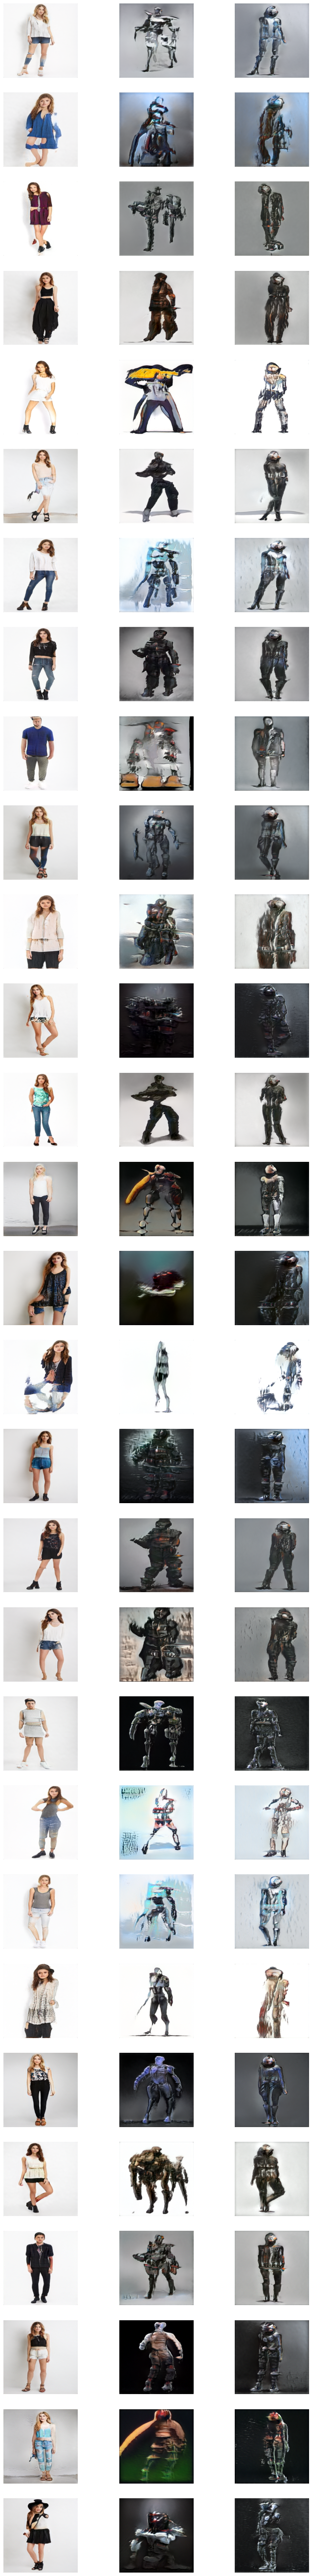

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

rcParams['figure.figsize'] = 12 ,100

fig = plt.figure()
n = 1
num_imgs = 30
for i in range(1,num_imgs):
    seed = seeds[i]
    
    human_img = f'./results/generated/human/seed{seed:04d}.png'
    robot_img = f'./results/generated/robot/seed{seed:04d}.png'
    human_robot_img = f'./results/generated/human_robot/seed{seed:04d}.png'
        
    human = mpimg.imread(human_img)
    robot = mpimg.imread(robot_img)
    human_robot = mpimg.imread(human_robot_img)
    fig.add_subplot(num_imgs,3,n)
    plt.imshow(human)
    plt.axis('off')
    
    fig.add_subplot(num_imgs,3,n+1)
    plt.imshow(robot)
    plt.axis('off')
    
    fig.add_subplot(num_imgs,3,n+2)
    plt.imshow(human_robot)
    plt.axis('off')
    n = n + 3